# Problem statement


This dataset is based on cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients' information.

As a data scientist we have to prepare a model to predict the risk of CHD.



# Dataset description

**Demographic**
- Sex: male or female
- Age: Age of the patient

**Behavioral**
- Current Smoker: whether or not the patient is a current smoker(0 means No,1 means-Yes)
- Cigs Per Day: the number of cigarettes that the person smoked on average in
  one day

**Medical( history)**
- BP Meds: whether or not the patient was on blood pressure medication(0 means No,1 means-Yes)
- Prevalent Stroke: whether or not the patient had previously had a stroke(0 means No,1 means-Yes)
- Prevalent Hyp: whether or not the patient was hypertensive(0 means No,1 means-Yes)
- Diabetes: whether or not the patient had diabetes(0 means No,1 means-Yes)
- Tot Chol: total cholesterol level
- Sys BP: systolic blood pressure
- Dia BP: diastolic blood pressure
- BMI: Body Mass Index
- Heart Rate: heart rate
- Glucose: glucose level
- Predict variable (desired target)
(10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

# Imorting libraries


In [1]:
import numpy as np      #importing numpy
import pandas as pd     #importing pandas
import matplotlib.pyplot as plt #importing matplotlib
import seaborn as sns   # importing seaborn
%matplotlib inline

# Loading dataset

In [2]:
data=pd.read_csv("/content/framingham.csv")

In [3]:
print("The shape of dataset is:",data.shape)

The shape of dataset is: (4238, 15)


# **Observation:-**
- **Dataset contains 4238 rows and 15 columns**

In [4]:
# Checking first 5 rows of dataset
data.head()

,gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,Male,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


- **Columns name**

In [5]:
data.columns

Index(['gender', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

- **datatypes of columns**

In [6]:
data.dtypes

gender              object
age                  int64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

# Observation:-
- Dataset contains 6 int type columns.
- Dataset contains 8 float type columns.
- Dataset contain 1 object type column.

- **Checking for null counts in features**

In [7]:
data.isnull().sum()

gender               0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
pd.DataFrame({"index":data.dtypes.index,
           "DataTypes":data.dtypes.values,
   "Null_counts":data.isnull().sum().values})


,index,DataTypes,Null_counts
0,gender,object,0
1,age,int64,0
2,currentSmoker,int64,0
3,cigsPerDay,float64,29
4,BPMeds,float64,53
5,prevalentStroke,int64,0
6,prevalentHyp,int64,0
7,diabetes,int64,0
8,totChol,float64,50
9,sysBP,float64,0


# Observations:-
 **Some features have null values**
- cigsPerDay
- BPMeds
- totChol
- BMI
- heartRate
- glucose

- **checking for category distribution in columns**

In [9]:
for col in data.columns:
    print("*"*50)
    print("category count for col {}".format(col))
    print(data[col].value_counts().count())

**************************************************
category count for col gender
2
**************************************************
category count for col age
39
**************************************************
category count for col currentSmoker
2
**************************************************
category count for col cigsPerDay
33
**************************************************
category count for col BPMeds
2
**************************************************
category count for col prevalentStroke
2
**************************************************
category count for col prevalentHyp
2
**************************************************
category count for col diabetes
2
**************************************************
category count for col totChol
248
**************************************************
category count for col sysBP
234
**************************************************
category count for col diaBP
146
**************************************************
cate

**Null imputation**
- **All columns having null values are continuous type except *BPMeds* so we will take mean of those column to fill continuous col and mode for categorical col**

In [10]:
data["cigsPerDay"].fillna(data["cigsPerDay"].mean(),inplace=True)
data["BPMeds"].fillna(data["BPMeds"].mode()[0],inplace=True)
data["totChol"].fillna(data["totChol"].mean(),inplace=True)
data["BMI"].fillna(data["BMI"].mean(),inplace=True)
data["heartRate"].fillna(data["heartRate"].mean(),inplace=True)
data["glucose"].fillna(data["glucose"].mean(),inplace=True)

- **Data description**

In [11]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,4238,2,Female,2419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,4238.0,NaN,NaN,NaN,49.584946,8.57216,32.0,42.0,49.0,56.0,70.0
currentSmoker,4238.0,NaN,NaN,NaN,0.494101,0.500024,0.0,0.0,0.0,1.0,1.0
cigsPerDay,4238.0,NaN,NaN,NaN,9.003089,11.87923,0.0,0.0,0.0,20.0,70.0
BPMeds,4238.0,NaN,NaN,NaN,0.029259,0.168552,0.0,0.0,0.0,0.0,1.0
prevalentStroke,4238.0,NaN,NaN,NaN,0.005899,0.076587,0.0,0.0,0.0,0.0,1.0
prevalentHyp,4238.0,NaN,NaN,NaN,0.310524,0.462763,0.0,0.0,0.0,1.0,1.0
diabetes,4238.0,NaN,NaN,NaN,0.02572,0.158316,0.0,0.0,0.0,0.0,1.0
totChol,4238.0,NaN,NaN,NaN,236.721585,44.326453,107.0,206.0,234.0,262.0,696.0
sysBP,4238.0,NaN,NaN,NaN,132.352407,22.038097,83.5,117.0,128.0,144.0,295.0


# Categorical and continous column distribution

here we will distribute features into categorical and continuous columns based on types variations in features.
If feature has more than 6 types it will treated as continuous else categorical.

In [12]:
categorical_col,continuous_col=[],[]    #creating two categories for column distribution
def categorical_continuous_columns(data):   #defining a function


 for col in data.columns:   #for loop to check for all column in data.columns
    if data[col].value_counts().count()<7:  #cheking if varieties are less than 6
        categorical_col.append(col)         #if condition is true column will add into categorical_col
    else:
        continuous_col.append(col)          #if above condition is false col will add in continuous_col
 return categorical_col,continuous_col

In [13]:
categorical_col,continuous_col=categorical_continuous_columns(data)

In [14]:
#Categorical column
categorical_col

['gender',
 'currentSmoker',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'TenYearCHD']

In [15]:
#Continuous column
continuous_col

['age',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

# **Uni variate analysis for categorical column**
- ***using pie chart and countplot***


**************************************************
value_counts for category gender

Female    2419
Male      1819
Name: gender, dtype: int64
**************************************************


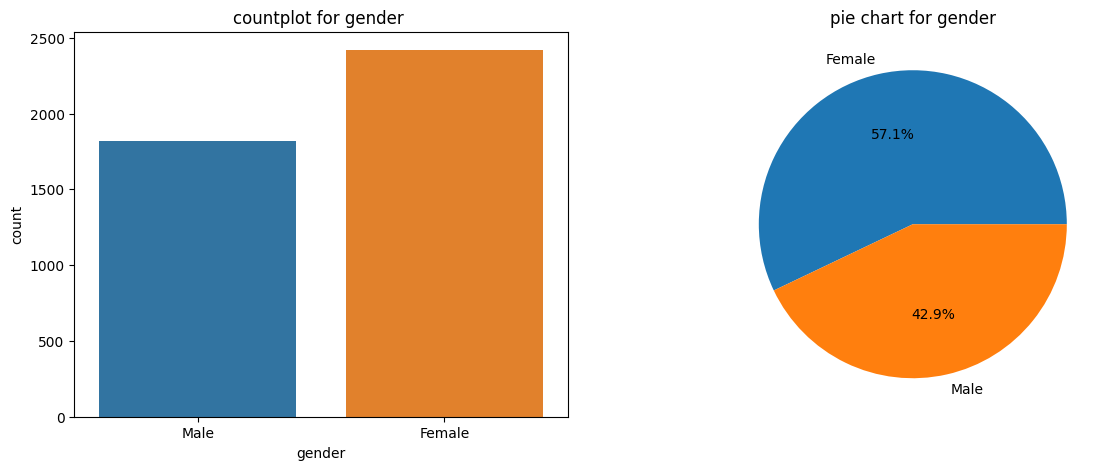

**************************************************
value_counts for category currentSmoker

0    2144
1    2094
Name: currentSmoker, dtype: int64
**************************************************


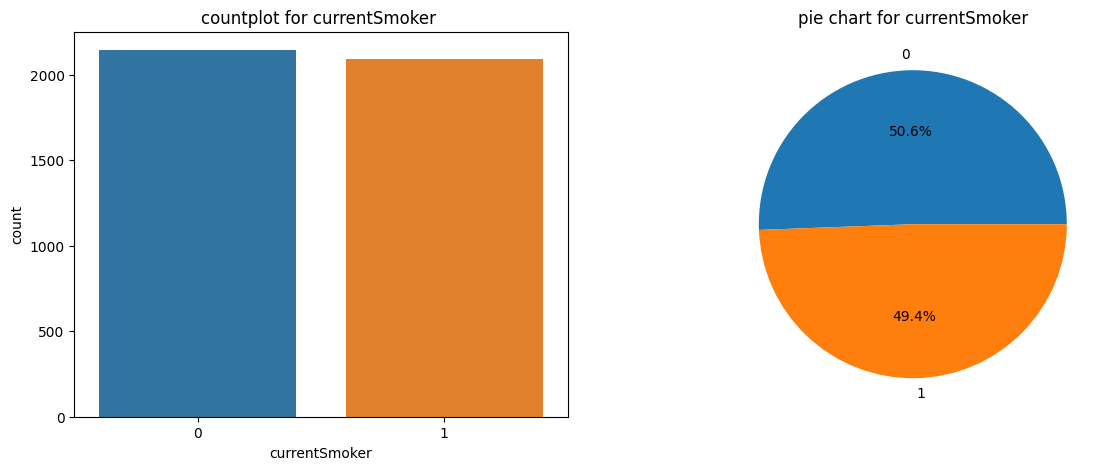

**************************************************
value_counts for category BPMeds

0.0    4114
1.0     124
Name: BPMeds, dtype: int64
**************************************************


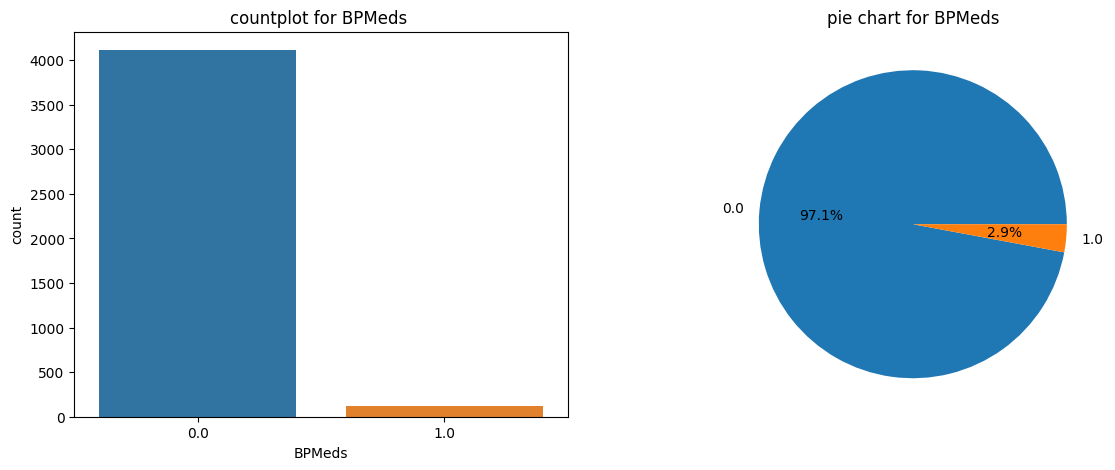

**************************************************
value_counts for category prevalentStroke

0    4213
1      25
Name: prevalentStroke, dtype: int64
**************************************************


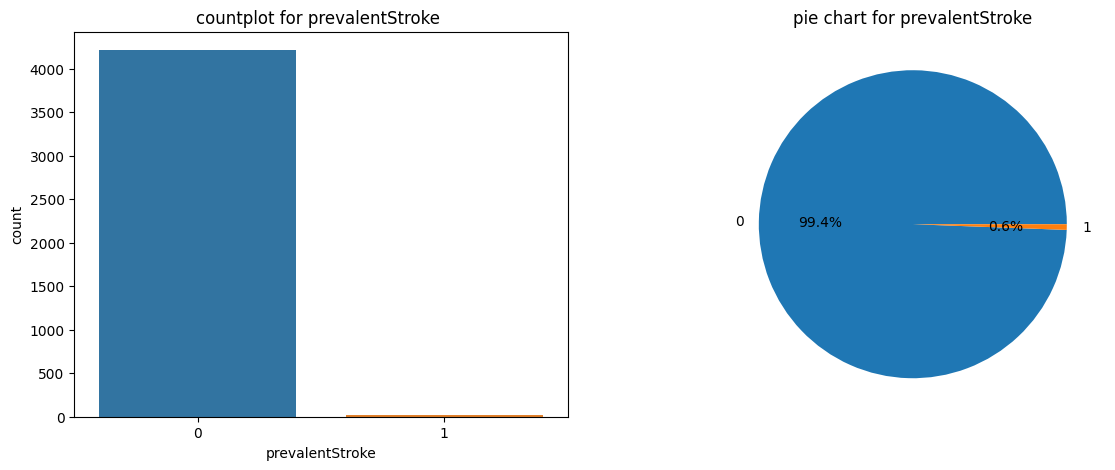

**************************************************
value_counts for category prevalentHyp

0    2922
1    1316
Name: prevalentHyp, dtype: int64
**************************************************


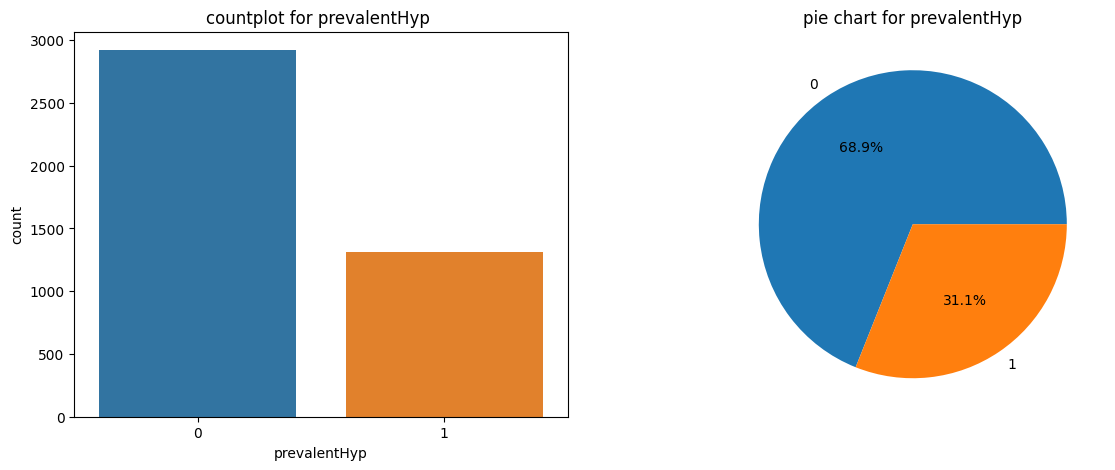

**************************************************
value_counts for category diabetes

0    4129
1     109
Name: diabetes, dtype: int64
**************************************************


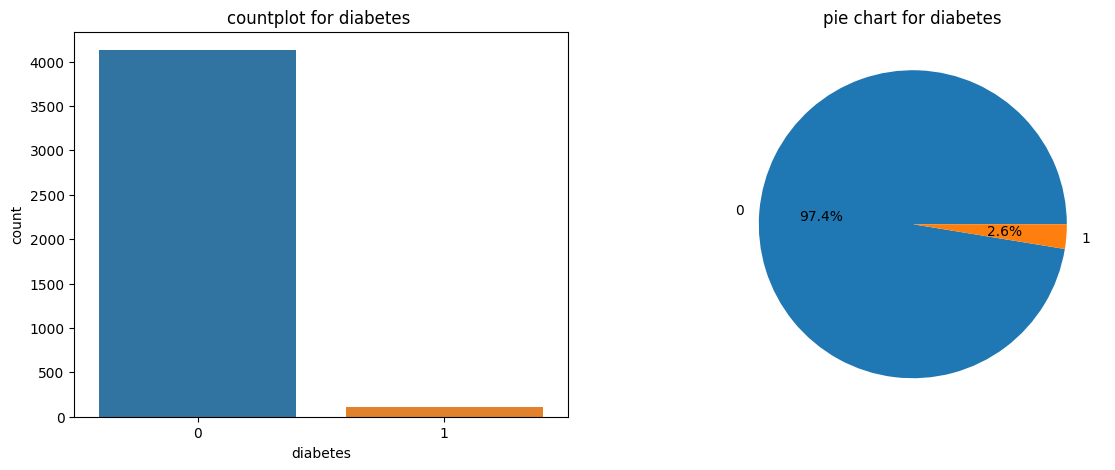

**************************************************
value_counts for category TenYearCHD

0    3594
1     644
Name: TenYearCHD, dtype: int64
**************************************************


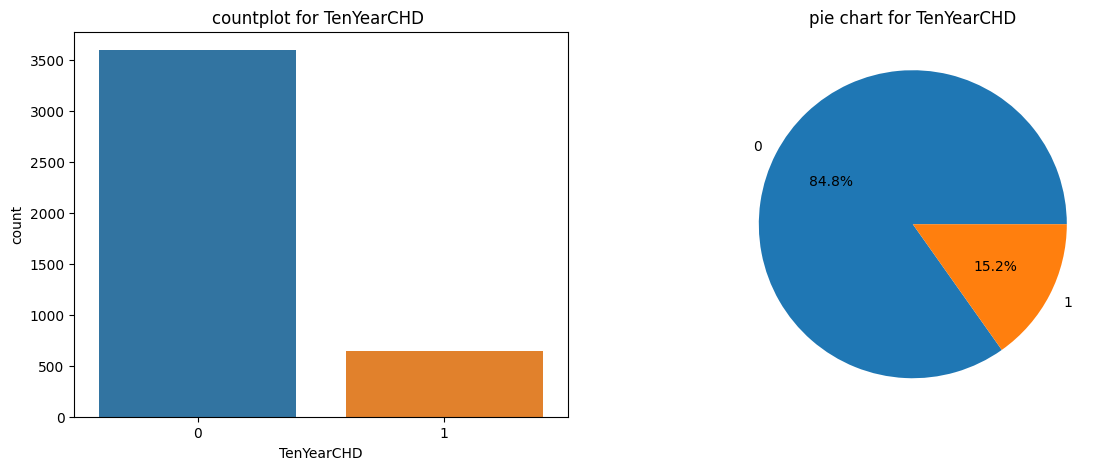

In [16]:
for col in categorical_col:
    plt.figure(figsize=[14,5]) # Definning figure size
    plt.subplot(1,2,1) #subplot 1
    print("*"*50) #printing seperator line
    print("value_counts for category {}\n".format(col))
    print(data[col].value_counts()) #value count for each category
    print("*"*50) #printing seperator line
    plt.title("countplot for {} ".format(col)) #Giving the title on top
    sns.countplot(data=data,x=col)  #countplot for categorical columns

    plt.subplot(1,2,2) #subplot 2
    plt.title("pie chart for {}".format(col))   #Giving the title on top
    mylabel=data[col].value_counts().index  #indexes for piechart
    y=data[col].value_counts().values   #values for index
    plt.pie(y,labels=mylabel,autopct="%1.1f%%") #pie chart for categorical columns

    plt.show();  #To remove the array in output  using plt.show();

# Observations:
- **It is observed that males having high chance of heart disease in next ten years as compared to females.**

# Bi-Variate analysis for categorical columns
- analysis using countplot with hue="TenYearCHD"


**************************************************
value_counts for category gender

Female    2419
Male      1819
Name: gender, dtype: int64


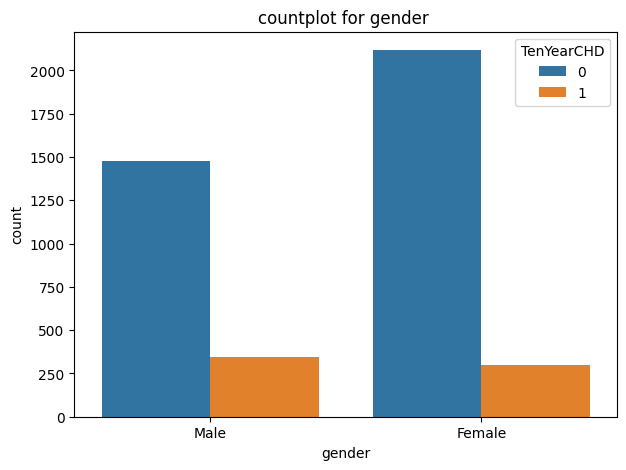

**************************************************
value_counts for category currentSmoker

0    2144
1    2094
Name: currentSmoker, dtype: int64


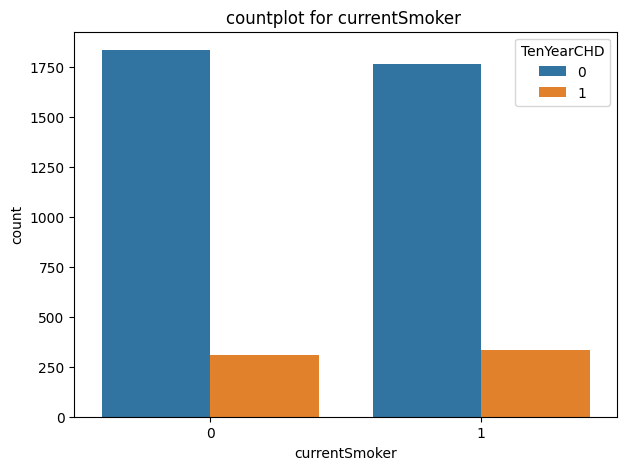

**************************************************
value_counts for category BPMeds

0.0    4114
1.0     124
Name: BPMeds, dtype: int64


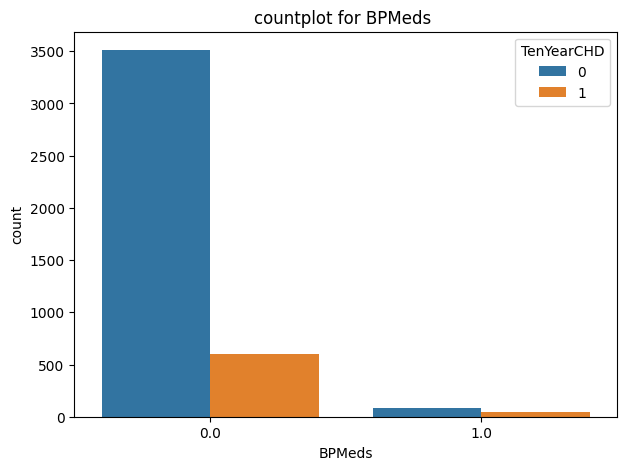

**************************************************
value_counts for category prevalentStroke

0    4213
1      25
Name: prevalentStroke, dtype: int64


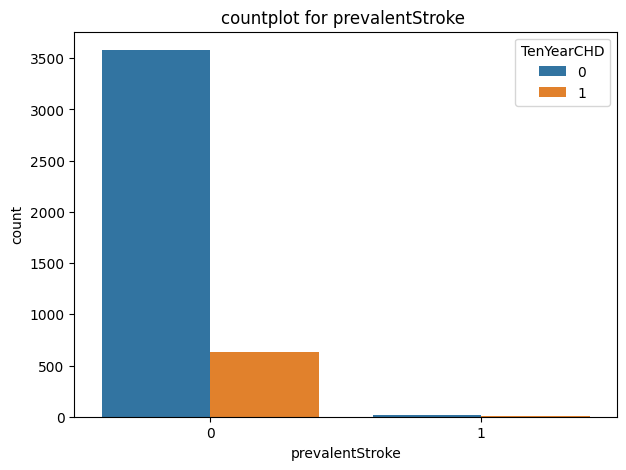

**************************************************
value_counts for category prevalentHyp

0    2922
1    1316
Name: prevalentHyp, dtype: int64


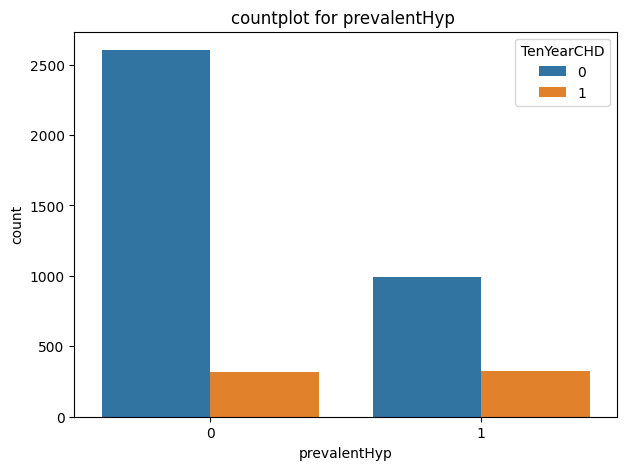

**************************************************
value_counts for category diabetes

0    4129
1     109
Name: diabetes, dtype: int64


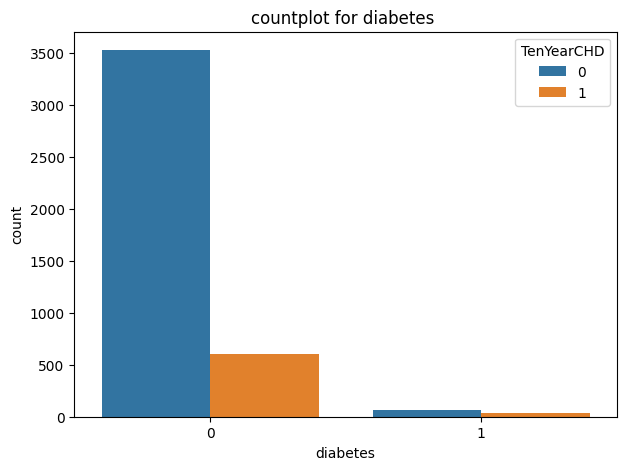

**************************************************
value_counts for category TenYearCHD

0    3594
1     644
Name: TenYearCHD, dtype: int64


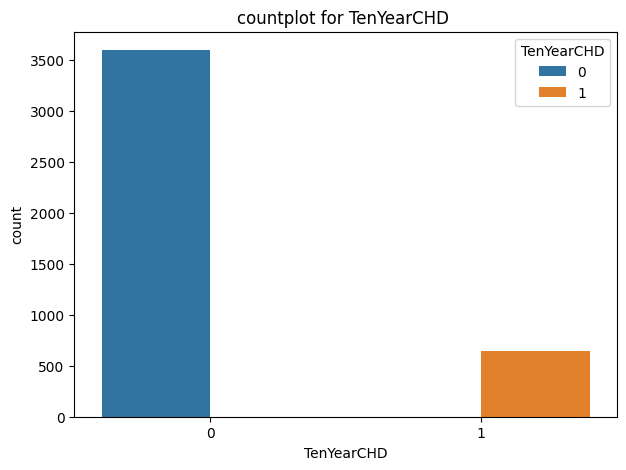

In [17]:
for col in categorical_col:
    plt.figure(figsize=[7,5]) # Definning figure size
    print("*"*50) #printing seperator line
    print("value_counts for category {}\n".format(col))
    print(data[col].value_counts()) #value count for each category
    plt.title("countplot for {} ".format(col)) #Giving the title on top
    sns.countplot(data=data,x=col,hue="TenYearCHD")  #countplot for categorical columns
    plt.show();

# Observations:-
- there are 57% females and 43% mans but it is observed that males has more chances to be suffered by heart disease in future.
- There is not much affect of smoking in heart disease as non smoker and smoker both have chances of suffering from disease.


# **Uni variate analysis for Continuous columns**
- *using histogram and boxplot*

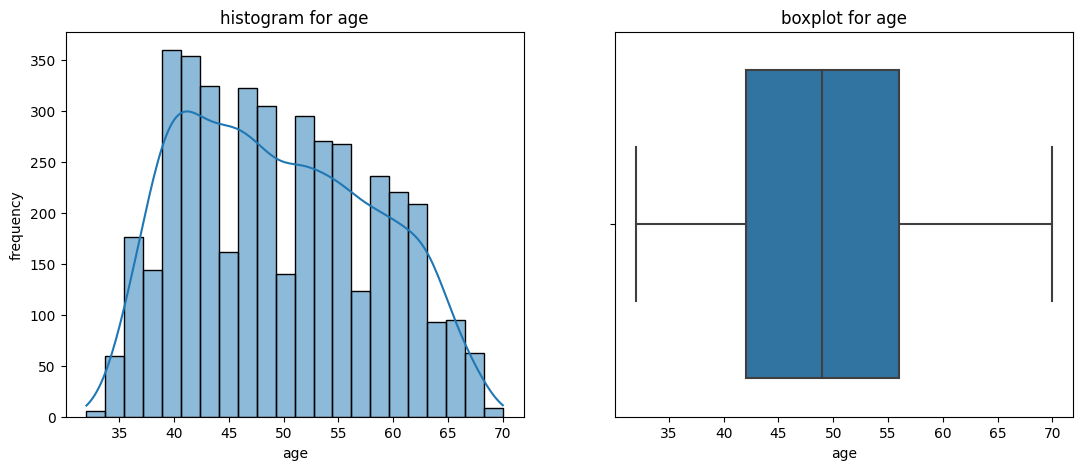

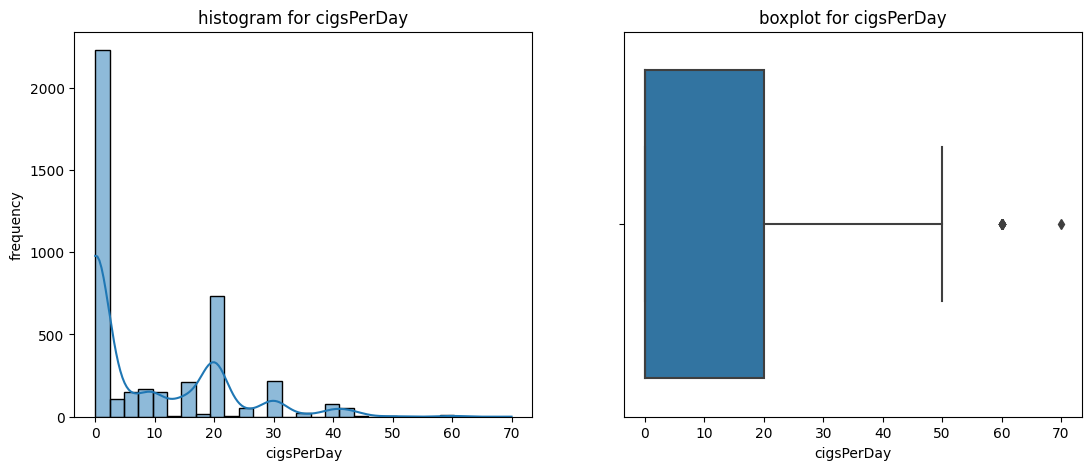

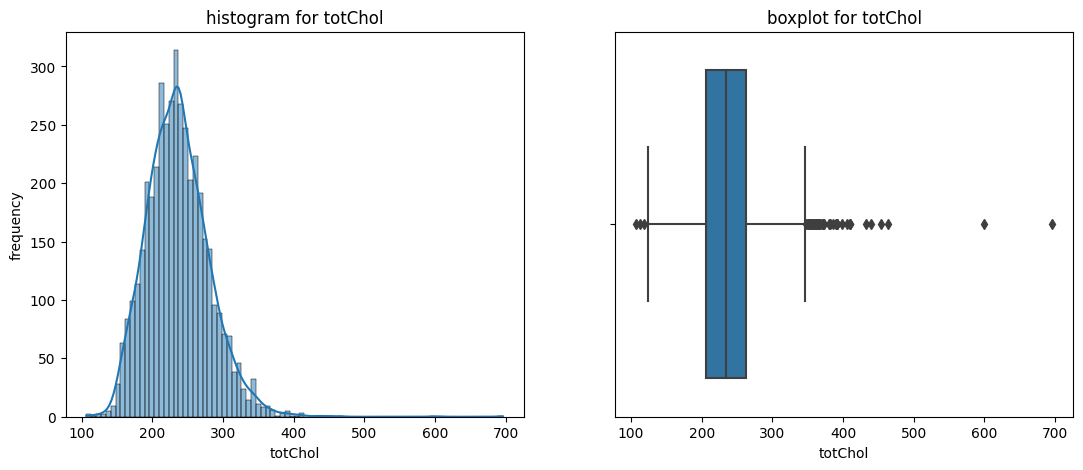

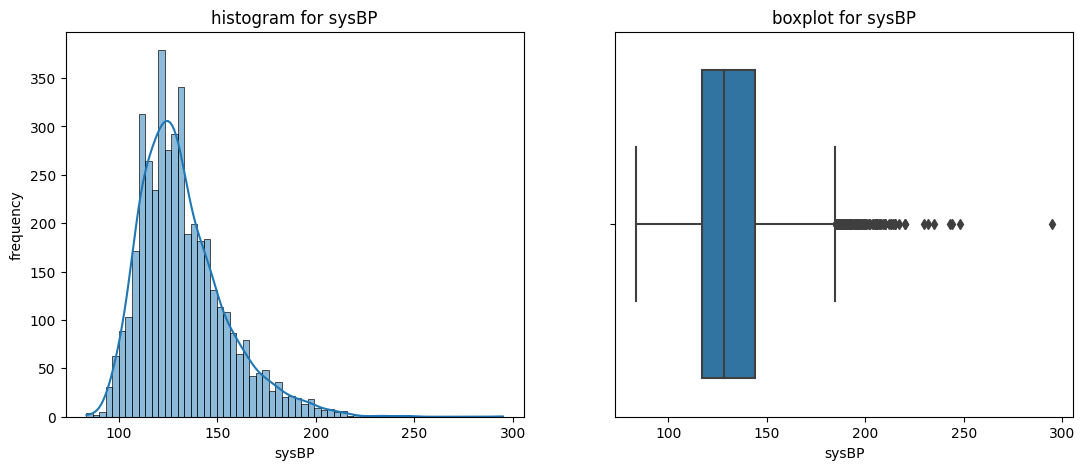

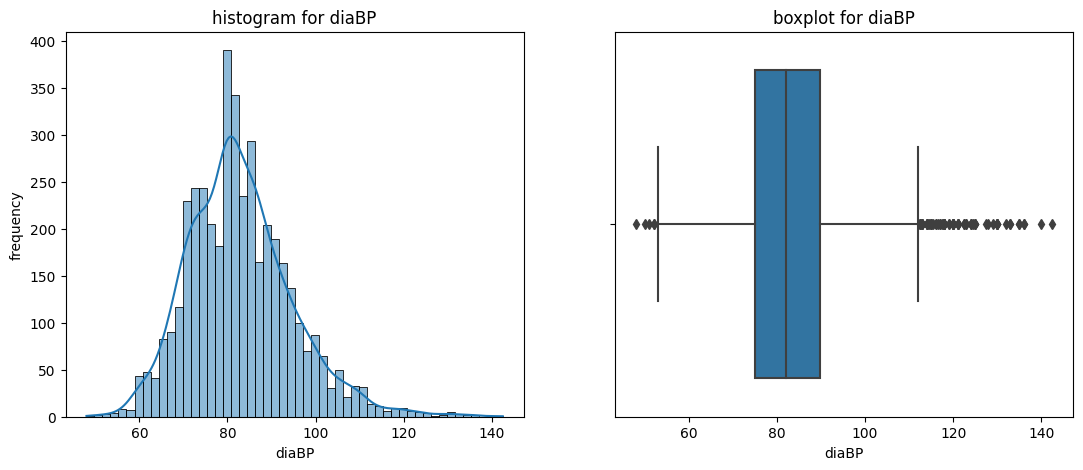

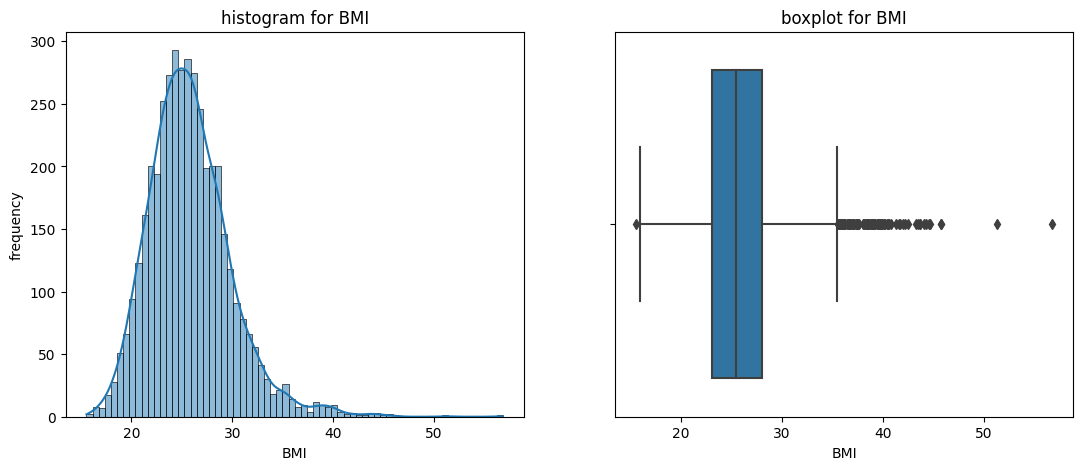

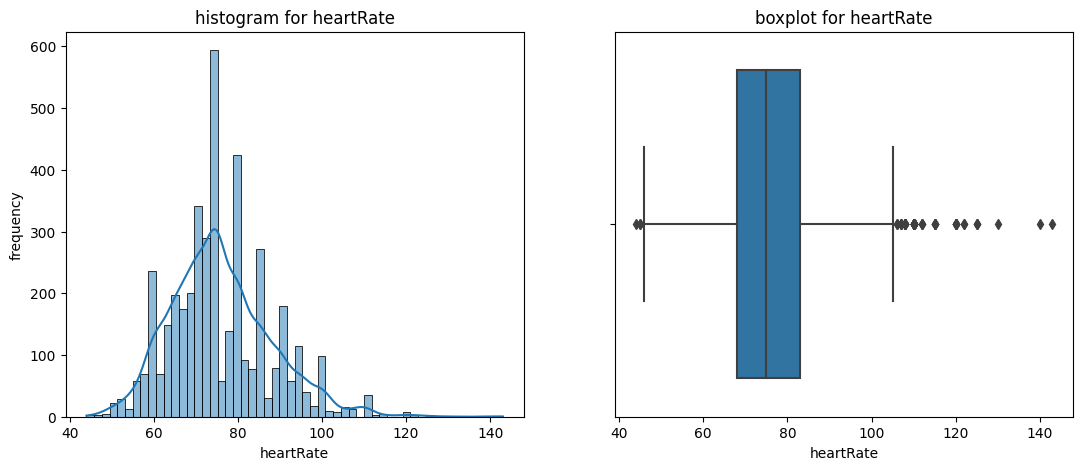

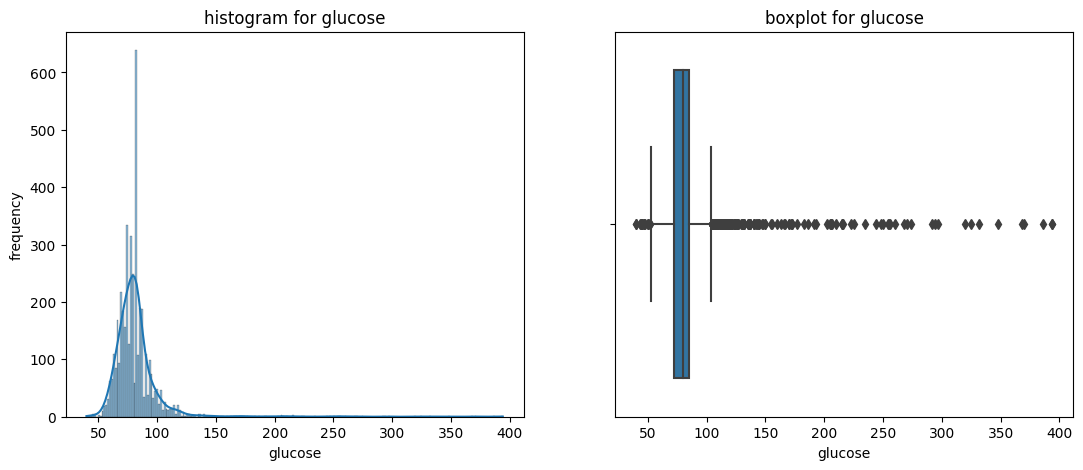

In [18]:
for col in continuous_col:
    plt.figure(figsize=[13,5])   #defining figure size
    plt.subplot(1,2,1)  #subplot 1 for histplot
    plt.title("histogram for {}".format(col))   #giving title to histograms
    plt.ylabel("frequency".format(col))
    plt.xlabel(col)  #giving name to x axis
    sns.histplot(data,x=data[col],kde=True) #Histogram distribution for continous columns
    plt.subplot(1,2,2)  #subplot 2 for histplot
    plt.title("boxplot for {}".format(col))   #giving title to boxplot
    plt.xlabel(col)
    sns.boxplot(data,x=data[col]) #Histogram distribution for continous columns


    plt.show();

# **correlation**

In [19]:
data.corr()

<ipython-input-19-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
age,1.000000,-0.213748,-0.192366,0.120955,0.057655,0.307194,0.101258,0.260270,0.394302,0.206104,0.135283,-0.012819,0.116850,0.225256
currentSmoker,-0.213748,1.000000,0.766970,-0.048358,-0.032988,-0.103260,-0.044295,-0.046285,-0.130230,-0.107746,-0.167276,0.062348,-0.054157,0.019456
cigsPerDay,-0.192366,0.766970,1.000000,-0.045663,-0.032706,-0.065947,-0.037063,-0.026025,-0.088505,-0.056391,-0.092453,0.074851,-0.056088,0.057775
BPMeds,0.120955,-0.048358,-0.045663,1.000000,0.114609,0.258697,0.051394,0.078712,0.251503,0.192356,0.099647,0.015139,0.048856,0.086417
prevalentStroke,0.057655,-0.032988,-0.032706,0.114609,1.000000,0.074830,0.006949,0.000067,0.057009,0.045190,0.024840,-0.017676,0.018055,0.061810
prevalentHyp,0.307194,-0.103260,-0.065947,0.258697,0.074830,1.000000,0.077808,0.163041,0.696755,0.615751,0.300572,0.147222,0.082924,0.177603
diabetes,0.101258,-0.044295,-0.037063,0.051394,0.006949,0.077808,1.000000,0.040092,0.111283,0.050329,0.086250,0.048993,0.605705,0.097317
totChol,0.260270,-0.046285,-0.026025,0.078712,0.000067,0.163041,0.040092,1.000000,0.207609,0.163903,0.114789,0.090676,0.044583,0.081624
sysBP,0.394302,-0.130230,-0.088505,0.251503,0.057009,0.696755,0.111283,0.207609,1.000000,0.784002,0.325247,0.182174,0.134608,0.216429
diaBP,0.206104,-0.107746,-0.056391,0.192356,0.045190,0.615751,0.050329,0.163903,0.784002,1.000000,0.376544,0.181246,0.058647,0.145299


<ipython-input-20-bbef9087e2cf>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap="YlGnBu")   #heatmap to show correlation between features


<Axes: >

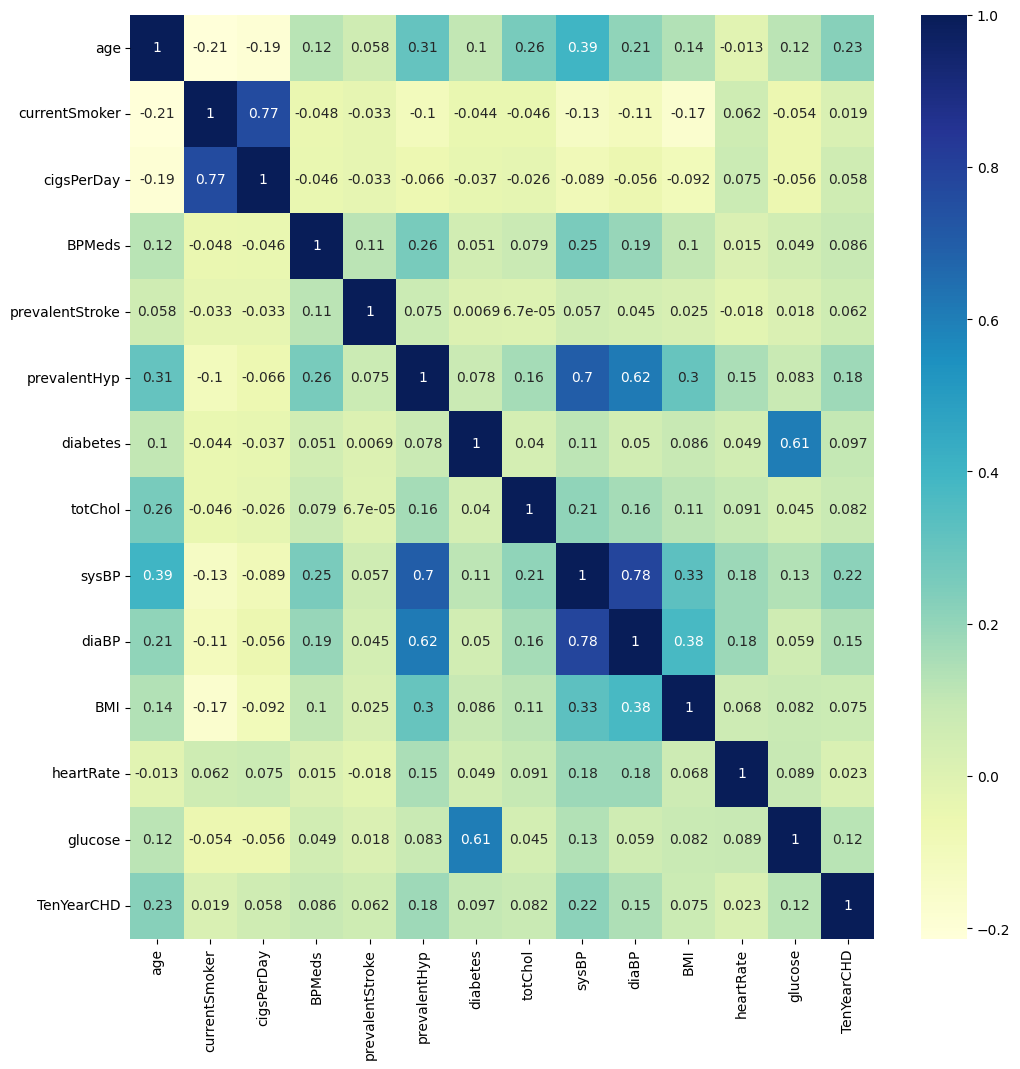

In [20]:
plt.figure(figsize=[12,12]) #defining figure size
sns.heatmap(data.corr(),annot=True,cmap="YlGnBu")   #heatmap to show correlation between features

# LOGISTIC REGRESSION MODEL

In [21]:
data2=data.copy()   #creating a copy of file

**Feature encoding**
- encoding of featurs using label encoder

In [22]:
from sklearn.preprocessing import LabelEncoder  #imporing labelencoder from sklearn
encoder=LabelEncoder()  #assigning labelencoder to encoder

In [23]:
data2["gender"]=encoder.fit_transform(data2["gender"])  #labelling of "gender" by using labelencoder

In [24]:
#checking if encoding done
data2

,gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.000000,1
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.000000,0
4235,0,48,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.000000,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,81.966753,0


# **preparing training and testing data**

In [25]:
#importing train test split from sklearn.model_selection
from sklearn.model_selection import train_test_split
x=data2.drop(["TenYearCHD"],axis=1) #input data to model except result "TenYearCHD"
y=data2["TenYearCHD"]   #TenYearCHD is prediction
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)   #defining training and test data, test size=0.2 means test data will be 20%.

In [26]:
#importing standard scaler to scale features
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [27]:
x_train=scale.fit_transform(x_train)    #scaling training data by standard scaler
x_test=scale.transform(x_test)  #transforming scale into test data

In [28]:
#loading training data to check if it scaled or not
x_train

array([[-0.86401528,  0.40872134, -0.98535792, ..., -0.93456924,
         2.64352734,  0.14397142],
       [-0.86401528, -0.06255939, -0.98535792, ..., -0.04719019,
        -0.33521877, -0.36115393],
       [ 1.15738693,  0.40872134,  1.01485966, ..., -0.54510844,
        -1.32813415, -0.86627928],
       ...,
       [-0.86401528,  0.05526079, -0.98535792, ...,  1.94201784,
        -0.08698993, -0.26931296],
       [-0.86401528,  0.17308097,  1.01485966, ..., -0.40953664,
        -0.91441941, -0.49891539],
       [ 1.15738693,  0.05526079, -0.98535792, ...,  0.1820494 ,
         1.15415428, -0.26931296]])

In [29]:
#importing logistic regression to create a model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [30]:
#Giving training to model by training data
model.fit(x_train,y_train)

LogisticRegression()

In [32]:
#predicting results on test data
y_pred=model.predict(x_test)

In [33]:
#creating dataframe to frame actual outcomes with predicted outcomes
df=pd.DataFrame({"actual_value":y_test,
                 "predict_value":y_pred})


In [34]:
df

,actual_value,predict_value
2166,0,0
2111,1,0
1301,0,0
487,0,0
2544,0,0
...,...,...
465,0,0
1584,0,0
1720,1,0
2348,0,0


# **Performance KPIs**
- analysis of model performance based on different different KPIs

In [35]:
#importing confusion_matrix,classificatio_report and accuracy_report from metrics to check model performance
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
class_report=classification_report(y_test,y_pred)   #to get classification reprt
acc_scr_test=accuracy_score(y_test,y_pred)*100   #to get accuracty_score
con_matrix=confusion_matrix(y_test,y_pred)  #to get confusion_,atrix

In [36]:
#confusion matrics
print("confusion_matrix for test data is\n",con_matrix)

confusion_matrix for test data is
 [[709   5]
 [121  13]]


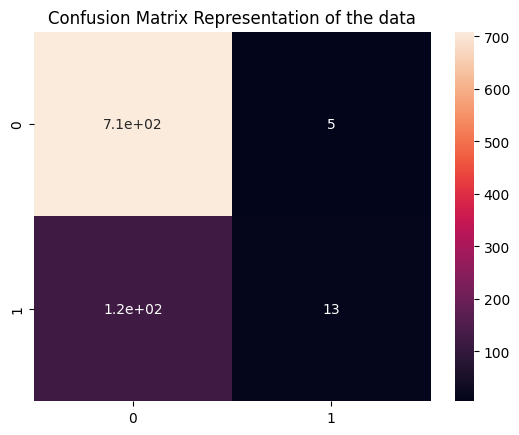

In [37]:
plt.title("Confusion Matrix Representation of the data")
sns.heatmap(con_matrix, annot = True)
plt.show();

In [38]:
#classification report
print("classification report for test prediction is \n",class_report)

classification report for test prediction is 
               precision    recall  f1-score   support

           0       0.85      0.99      0.92       714
           1       0.72      0.10      0.17       134

    accuracy                           0.85       848
   macro avg       0.79      0.55      0.54       848
weighted avg       0.83      0.85      0.80       848



In [39]:
#accuracy score
print(f"accuracy score for test data is {acc_scr_test} %")

accuracy score for test data is 85.14150943396226 %


In [40]:
#predicting results on test data
y_pred_train=model.predict(x_train)

In [41]:
df_train=pd.DataFrame({"actual_train":y_train,
                      "pred_train":y_pred_train})

In [42]:
df_train

,actual_train,pred_train
913,0,0
2842,0,0
201,0,0
3192,0,0
1311,0,0
...,...,...
3287,0,0
3706,0,0
2140,0,0
2411,0,0


In [43]:
from sklearn.metrics import accuracy_score
acc_scr_train=accuracy_score(y_train,y_pred_train)*100
print(f"accuracy score for train data is {acc_scr_train}%")

accuracy score for train data is 85.54572271386431%


# BIAS and VARIANCE
- A High BIAS and Low variance is observed when training loss is higher than test loss. It is also called under-fitting.
- A High variance but Low BIAS is observed when test loss is more than training loss. It also called over-fitting.

In [44]:
train_loss=100-acc_scr_train
print("train loss is ",train_loss)
test_loss=100-acc_scr_test
print("test loss is ",test_loss)


train loss is  14.454277286135692
test loss is  14.858490566037744


- Observation: There is no much difference in train and test loss.

#Learning curve for model

In [45]:
from sklearn.model_selection import learning_curve  #importing learning curve
train_sizes,train_scores,test_scores=learning_curve(model,x,y,cv=10,train_sizes=np.linspace(0.01,1,10)) #assigning tarinsize,trainscore and testscore)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

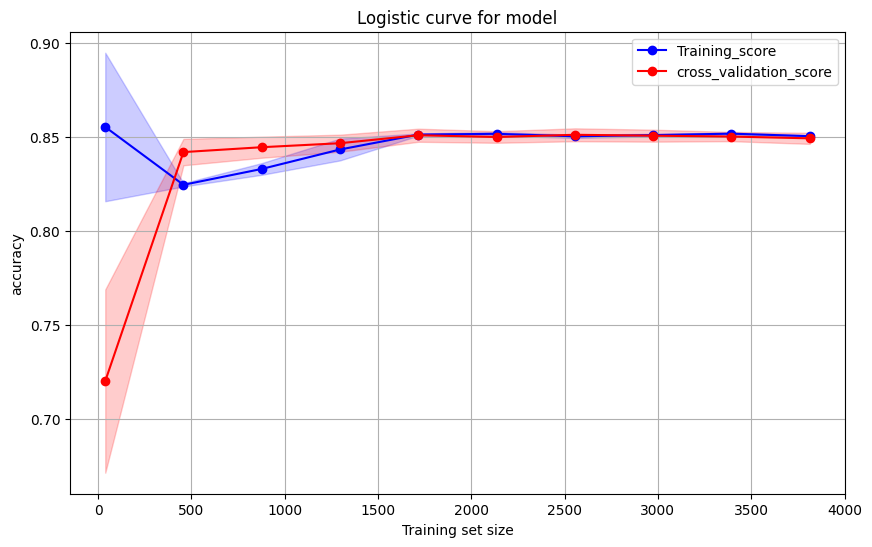

In [46]:
plt.figure(figsize=[10,6])  #defining figure size
plt.plot(train_sizes,train_mean,label="Training_score",marker='o',color="blue",)    #plotting train score
plt.fill_between(train_sizes,train_mean-train_std,train_mean+train_std,alpha=0.2,color="blue")
plt.plot(train_sizes,test_mean,label="cross_validation_score",marker='o',color="red")   #ploting cross validation score
plt.fill_between(train_sizes,test_mean-test_std,test_mean+test_std,alpha=0.2,color="red")
plt.xlabel("Training set size") #x label
plt.ylabel("accuracy")  #ylabel
plt.title("Logistic curve for model")   #title for figure
plt.legend(loc="best") #to best fit for legend
plt.grid(); #to ass grid in background
plt.show();

# Regularization

In [47]:
!pip install scikit-learn==1.2.*

In [48]:
#model_log_reg_l1
model_log_reg_l1=LogisticRegression(penalty="l1",solver="liblinear")
model_log_reg_l1.fit(x_train,y_train) #initialising model with penalty l1
model_log_reg_l1_prediction=model_log_reg_l1.predict(x_test)
accuracy_score_reg_l1=accuracy_score(model_log_reg_l1_prediction,y_test)*100
print("accuracy score with l1 is:",accuracy_score_reg_l1)

accuracy score with l1 is: 85.14150943396226


In [49]:
#model_log_reg_l2
model_log_reg_l2=LogisticRegression(penalty="l2") #initialising model with penalty l2
model_log_reg_l2.fit(x_train,y_train)
model_log_reg_l2_prediction=model_log_reg_l2.predict(x_test)
accuracy_score_reg_l2=accuracy_score(model_log_reg_l2_prediction,y_test)*100
print("accuracy score with l2 is:",accuracy_score_reg_l2)

accuracy score with l2 is: 85.14150943396226


In [50]:
#model_log_reg_elastic
model_log_reg_elastic=LogisticRegression(penalty="elasticnet") #initialising model with penalty elasticnet
from sklearn.linear_model import ElasticNet
model_log_reg_elastic=ElasticNet()
model_log_reg_elastic.fit(x_train,y_train)
model_log_reg_elastic_prediction=model_log_reg_elastic.predict(x_test)
accuracy_score_reg_elastic=accuracy_score(y_test,model_log_reg_elastic_prediction.round(),normalize=True)*100
print("accuracy score with elasticnet is:",accuracy_score_reg_elastic)

accuracy score with elasticnet is: 84.19811320754717


# **Hyperparameter tuning**
- There are ideally two approach for the hyperparameter tuning.
-**Approach1 GridSearchCV:**
 - with the gridsearchcv module we fit every hyperparameter that we explicitly specify in the parameter grid and train our model accordingly.
 - As this approach care of all of the hyperparameters specified hence,it takes more computation time.
 -However, it is shown that the accuracy with gridsearchcv is high.
-**approach2**
 - with the RandomSearchCV module we fit every hyperparameter that we explicitly specify in the parameter grid at a random and train our model accordingly.
 - As this approach care of all of the hyperparameters specified at a random hence,it is shown that it takes less computation time.
 -However, it is shown that the accuracy with RandomSearchCV is slightly less.



- **GridSearchCV**

In [51]:
from sklearn.model_selection import GridSearchCV    #importing gridsearchcv
penalty=["l1","l2","elasticnet",None]
solver=["lbfgs","liblinear","newton-cg","newton-cholesky","sag","saga"]
param_grid={"penalty":penalty,
            "solver":solver,
            "fit_intercept":[True,False]
            }
model_grid_search=GridSearchCV(LogisticRegression(),param_grid)

model_grid_search.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
110 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Sol

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [52]:
#to get best_fit_parameter
model_grid_search.best_params_

{'fit_intercept': True, 'penalty': 'l1', 'solver': 'liblinear'}

In [65]:
#tuning using bestParams
log_reg_grid_tuned=LogisticRegression(fit_intercept=True,penalty='l1',solver="liblinear")
log_reg_grid_tuned.fit(x_train,y_train) #training with best fit parameter
tuned_prediction_grid=log_reg_grid_tuned.predict(x_test)    #prediction on test data

In [66]:
tuned_prediction_grid

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [67]:
accuracy_scr_grid_tuned=accuracy_score(tuned_prediction_grid,y_test)*100
#accuracy_score of tuned data
print("accuracy score with gridsearch tuned is: ",accuracy_scr_grid_tuned)

accuracy score with gridsearch tuned is:  85.14150943396226


# Learning curve for tuned data

In [68]:
from sklearn.model_selection import learning_curve
train_loss,test_loss
train_sizes_t,train_scores_t,test_scores_t=learning_curve(log_reg_grid_tuned,x,y,cv=10,train_sizes=np.linspace(0.01,1,10))
train_loss=1-acc_scr_train
test_loss=1-acc_scr_test
train_mean_t=np.mean(train_scores_t,axis=1)
train_std_t=np.std(train_scores_t,axis=1)
test_mean_t=np.mean(test_scores_t,axis=1)
test_std_t=np.std(test_scores_t,axis=1)

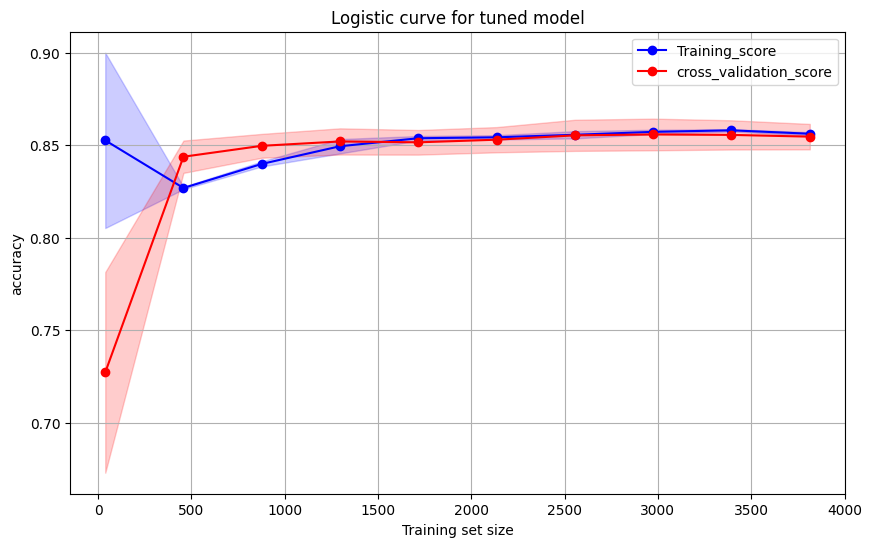

In [69]:
plt.figure(figsize=[10,6])
plt.plot(train_sizes_t,train_mean_t,label="Training_score",marker='o',color="blue")
plt.fill_between(train_sizes_t,train_mean_t-train_std_t,train_mean_t+train_std_t,alpha=.2,color="blue")
plt.plot(train_sizes_t,test_mean_t,label="cross_validation_score",marker='o',color="red")
plt.fill_between(train_sizes_t,test_mean_t-test_std_t,test_mean_t+test_std_t,alpha=.2,color="red")
plt.xlabel("Training set size")
plt.ylabel("accuracy")
plt.title("Logistic curve for tuned model")
plt.legend(loc="best")
plt.grid();
plt.show();

- **RandomSearchCV**

In [70]:
from sklearn.model_selection import RandomizedSearchCV  #importing RandomizedSearchCV
param_random={"penalty":["l1","l2","elasticnet",None],
            "fit_intercept":[True,False]
            }
model_random_search=RandomizedSearchCV(LogisticRegression(),param_random)

model_random_search.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py"

RandomizedSearchCV(estimator=LogisticRegression(),
                   param_distributions={'fit_intercept': [True, False],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None]})

In [71]:
#to get best parameters
model_random_search.best_params_

{'penalty': 'l2', 'fit_intercept': True}

In [72]:
#tuning using bestParams
log_reg_random_tuned=LogisticRegression(fit_intercept=True,penalty=None)
log_reg_random_tuned.fit(x_train,y_train)
tuned_prediction_random=log_reg_random_tuned.predict(x_test)


In [73]:
tuned_prediction_random

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [74]:
accuracy_scr_random_tuned=accuracy_score(tuned_prediction_random,y_test)*100
#accuracy_score of tuned data
print("accuracy score with randomsearch tuned is: ",accuracy_scr_random_tuned)

accuracy score with randomsearch tuned is:  85.14150943396226


#Accuracy on each level

In [75]:
accuracy_all_model=pd.DataFrame({"model_name":["y_prediction_test","y_prediction_train","tuned_gridsearchcv","tuned_randomsearchcv","l1_parameter","l2_parameter","elasticnet_parameter"],
 "Accuracy":[acc_scr_test,acc_scr_train,accuracy_scr_grid_tuned,accuracy_scr_random_tuned,accuracy_score_reg_l1,accuracy_score_reg_l2,accuracy_score_reg_elastic]})


In [76]:
accuracy_all_model

,model_name,Accuracy
0,y_prediction_test,85.141509
1,y_prediction_train,85.545723
2,tuned_gridsearchcv,85.141509
3,tuned_randomsearchcv,85.141509
4,l1_parameter,85.141509
5,l2_parameter,85.141509
6,elasticnet_parameter,84.198113
